In [2]:
library(plyr)
library(dplyr)
library(ggplot2)
library(MASS)
library(cowplot)
library(forcats)
library(ggforce)
library(ggrepel)
library(scales)
library(tidyr)
library(xts)
library(zoo)
library(ggraph)
library(igraph)
library(knitr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘igraph’

The following object 

In [3]:
soccerPitch <- function(lengthPitch = 105, widthPitch = 68, arrow = c("none", "r", "l"), theme = c("light", "dark", "grey", "grass")) {
  
  # define colours by theme
  if(theme[1] == "grass") {
    fill1 <- "#008000"
    fill2 <- "#328422"
    colPitch <- "grey85"
    arrowCol <- "white"
    colText <- "white"
  } else if(theme[1] == "light") {
    fill1 <- "grey98"
    fill2 <- "grey98"
    colPitch <- "grey60"
    arrowCol = "black"
    colText <- "black"
  } else if(theme[1] %in% c("grey", "gray")) {    
    fill1 <- "#A3A1A3"
    fill2 <- "#A3A1A3"
    colPitch <- "white"
    arrowCol <- "white"
    colText <- "black"
  } else if(theme[1] == "dark") {  
    fill1 <- "#1C1F26"
    fill2 <- "#1C1F26"
    colPitch <- "white"
    arrowCol <- "white"
    colText <- "white"
  } else if(theme[1] == "blank") {
    fill1 <- "white"
    fill2 <- "white"
    colPitch <- "white"
    arrowCol <- "black"
    colText <- "black"
  }
  lwd <- 0.5
  
  border <- c(5, 5, 5, 5)
      
  # mowed grass lines
  lines <- (lengthPitch + border[2] + border[4]) / 13
  boxes <- data.frame(start = lines * 0:12 - border[4], end = lines * 1:13 - border[2])[seq(2, 12, 2),]
  
  # draw pitch
  p <- ggplot() +
    # background
    geom_rect(aes(xmin = -border[4], xmax = lengthPitch + border[2], ymin = -border[3], ymax = widthPitch + border[1]), fill = fill1) +
    # mowed pitch lines
    geom_rect(data = boxes, aes(xmin = start, xmax = end, ymin = -border[3], ymax = widthPitch + border[1]), fill = fill2) +
    # perimeter line
    geom_rect(aes(xmin = 0, xmax = lengthPitch, ymin = 0, ymax = widthPitch), fill = NA, col = colPitch, lwd = lwd) +
    # centre circle
    geom_circle(aes(x0 = lengthPitch/2, y0 = widthPitch/2, r = 9.15), col = colPitch, lwd = lwd) +
    # kick off spot
    geom_circle(aes(x0 = lengthPitch/2, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    # halfway line
    geom_segment(aes(x = lengthPitch/2, y = 0, xend = lengthPitch/2, yend = widthPitch), col = colPitch, lwd = lwd) +
    # penalty arcs
    geom_arc(aes(x0= 11, y0 = widthPitch/2, r = 9.15, start = pi/2 + 0.9259284, end = pi/2 - 0.9259284), col = colPitch, lwd = lwd) +
    geom_arc(aes(x0 = lengthPitch - 11, y0 = widthPitch/2, r = 9.15, start = pi/2*3 - 0.9259284, end = pi/2*3 + 0.9259284), 
             col = colPitch, lwd = lwd) +
    # penalty areas
    geom_rect(aes(xmin = 0, xmax = 16.5, ymin = widthPitch/2 - 20.15, ymax = widthPitch/2 + 20.15), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch - 16.5, xmax = lengthPitch, ymin = widthPitch/2 - 20.15, ymax = widthPitch/2 + 20.15), 
              fill = NA, col = colPitch, lwd = lwd) +
    # penalty spots
    geom_circle(aes(x0 = 11, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    geom_circle(aes(x0 = lengthPitch - 11, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    # six yard boxes
    geom_rect(aes(xmin = 0, xmax = 5.5, ymin = (widthPitch/2) - 9.16, ymax = (widthPitch/2) + 9.16), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch - 5.5, xmax = lengthPitch, ymin = (widthPitch/2) - 9.16, ymax = (widthPitch/2) + 9.16), 
              fill = NA, col = colPitch, lwd = lwd) +
    # goals
    geom_rect(aes(xmin = -2, xmax = 0, ymin = (widthPitch/2) - 3.66, ymax = (widthPitch/2) + 3.66), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch, xmax = lengthPitch + 2, ymin = (widthPitch/2) - 3.66, ymax = (widthPitch/2) + 3.66), 
              fill = NA, col = colPitch, lwd = lwd) +
    coord_fixed() +
    theme(rect = element_blank(), 
          line = element_blank(),
          axis.text = element_blank(),
          axis.title = element_blank())
 
  return(p)
  
}

In [4]:
events <- read.csv('../data/processed_events_England.csv')

x_scale <- 105
y_scale <- 68

events$location_x <- events$location_x/100 * x_scale
events$target_x <- events$target_x/100 * x_scale

events$location_y <- y_scale - (events$location_y/100 * y_scale)
events$target_y <- y_scale - (events$target_y/100 * y_scale)

In [5]:
game <- events[events$matchId == '2500032' & events$team == 'Liverpool',]

In [6]:
game_events <- game[game$eventName == 'Pass'| 
                    game$eventName == 'Shot' | 
                    game$eventName == 'On the Ball' | 
                    game$eventName == 'Challenge' | 
                    game$eventName == 'Free Kick',]

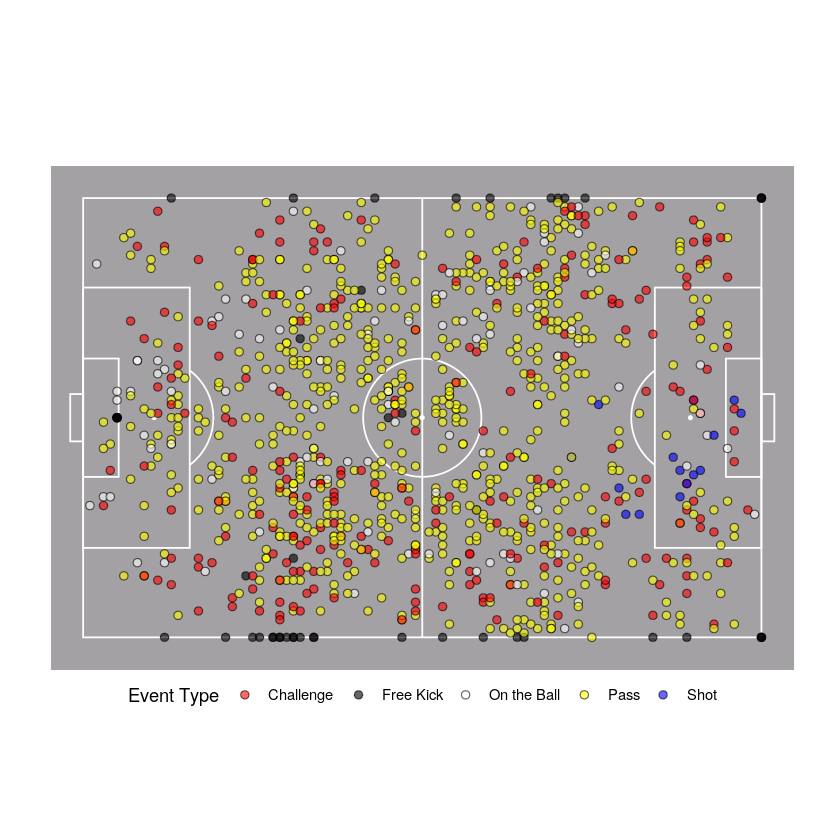

In [7]:
soccerPitch(theme='grey') + 
    geom_point(data = game_events, 
           aes(location_x , location_y, fill=eventName), pch=21, alpha=0.6, size=2 ) + 
    theme(legend.direction='horizontal', legend.position=c(0.5,0)) +
    scale_fill_manual(values=c("red", "black", 'white', "yellow", 'blue'), name='Event Type')

In [8]:
passes <- game[game$eventName=='Pass',][game$team=='Liverpool',]

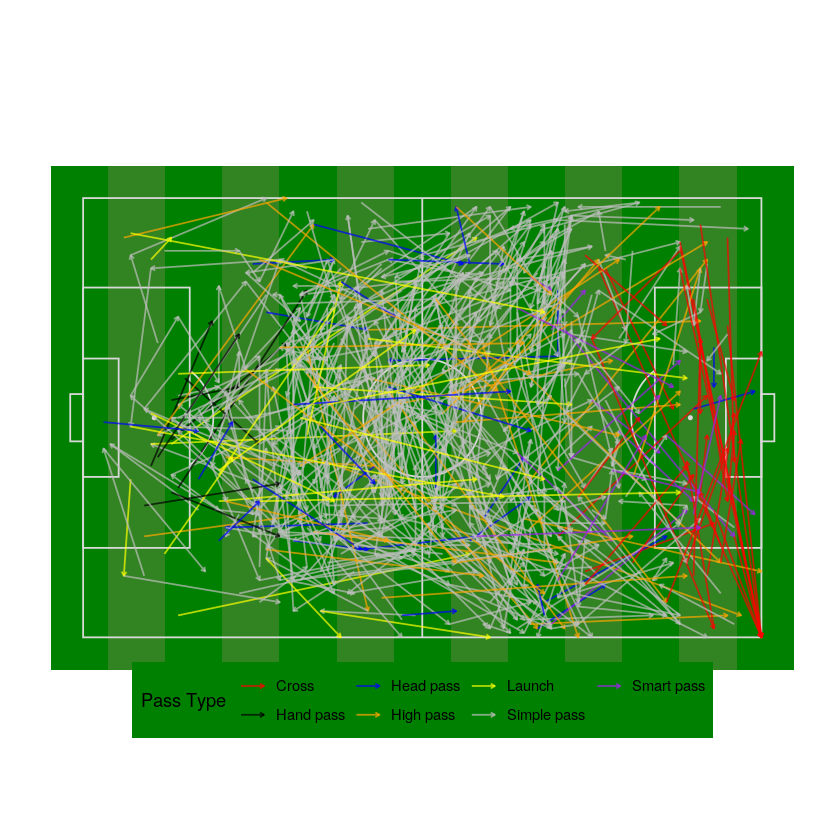

In [9]:
soccerPitch(theme='grass') + 
    geom_segment(data=na.exclude(passes), aes(x=location_x, y=location_y, xend=target_x, yend=target_y, color=subEventName), alpha=0.7, arrow = arrow(length = unit(0.1,"cm"))) +
    theme(legend.position=c(0.5,-0.01), legend.direction='horizontal',
          legend.background=element_rect(fill='#008000', linetype='solid')) +
    scale_color_manual(values=c("red", "black", 'blue', 'orange', "yellow", 'grey', 'purple'), name='Pass Type')

In [10]:
table <- events[531395:531412,]
df <- data.frame(table$matchPeriod, table$time, table$team, table$subEventName, table$source)
names(df) <- c('Half', 'Time', 'Team', 'Event Description', 'Player')
kable(df)



|Half |Time  |Team           |Event Description     |Player                |
|:----|:-----|:--------------|:---------------------|:---------------------|
|2H   |38:07 |Crystal Palace |Goal kick             |W. Hennessey          |
|2H   |38:12 |Liverpool      |Air duel              |J. Matip              |
|2H   |38:12 |Crystal Palace |Air duel              |C. Benteke            |
|2H   |38:15 |Liverpool      |Hand pass             |L. Karius             |
|2H   |38:18 |Liverpool      |Touch                 |V. van Dijk           |
|2H   |38:22 |Liverpool      |Simple pass           |V. van Dijk           |
|2H   |38:23 |Liverpool      |High pass             |J. Milner             |
|2H   |38:27 |Liverpool      |Simple pass           |T. Alexander-Arnold   |
|2H   |38:30 |Liverpool      |Touch                 |A. Oxlade-Chamberlain |
|2H   |38:31 |Liverpool      |Simple pass           |T. Alexander-Arnold   |
|2H   |38:32 |Liverpool      |Simple pass           |J. Henderson         

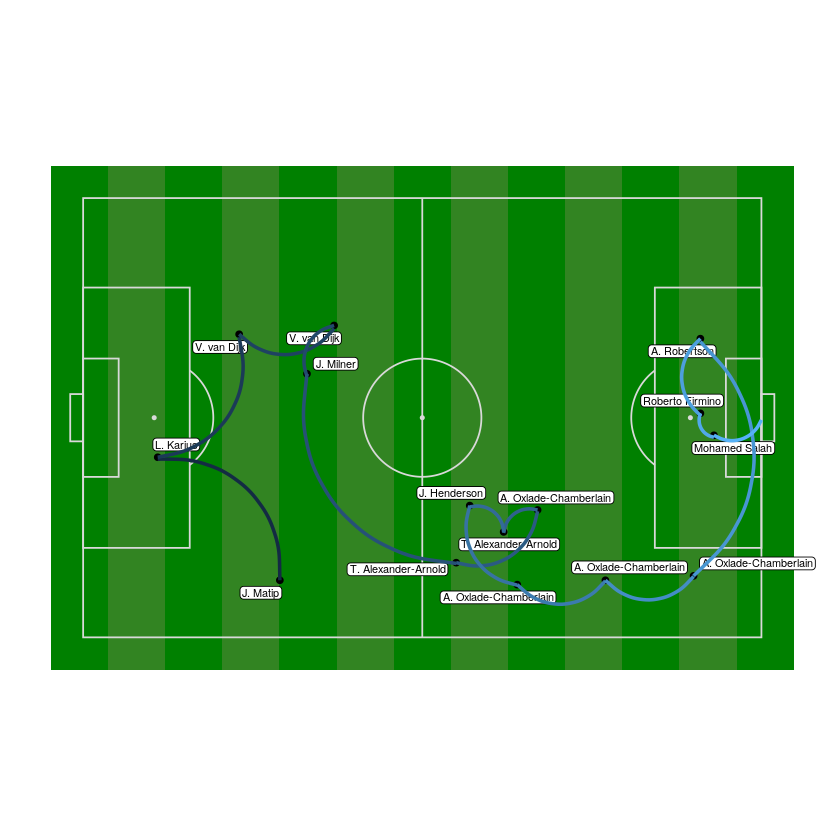

In [11]:
id <-  '2500032-91-Liv-0'
data <- events[events$possession == id,]

soccerPitch(theme='grass') + geom_point(data = data,
               aes(location_x , location_y)) + 
    geom_label_repel(data = data, aes(location_x, location_y, label = source), label.padding=0.1, size=2.3, alpha=1) +
 geom_curve(data = data,
              aes(x = location_x, xend = target_x, y = location_y, yend = target_y*.99, col = X), show.legend=FALSE, size=1, alpha = 1)

youtube clip
<img src="../figures/youtube_clip.gif" width='700'>

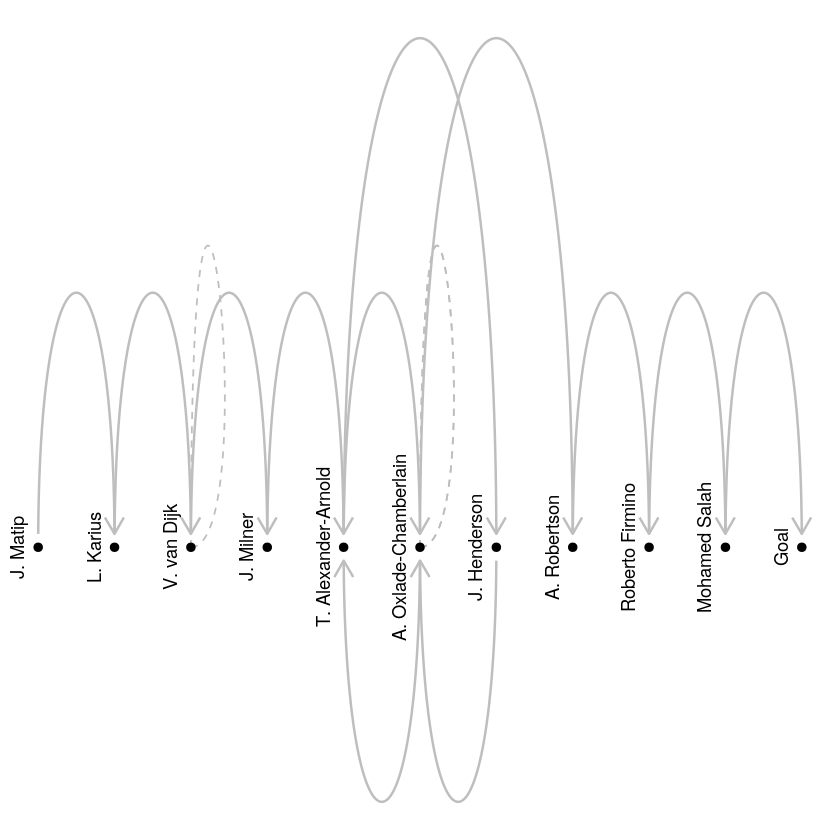

In [12]:
nodes <- unique(c(as.character(data$source),as.character(data$target)))
edges <- data.frame(data$source, data$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
ggraph(g, layout='linear') + 
    geom_edge_arc(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name)), 
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey', linetype='dashed') +
    geom_node_point(size=2, color='black', fill='white') +
    geom_node_text(aes(label = name), repel=T, angle=90, hjust=2, ) +
    theme_void()

In [8]:
# compare goal sequences

In [14]:

goal_seqs <- unique(events[events$subEventName=='Goal',]$possession)
match_seqs <- unique(events[events$matchId == '2500032',]$possession)

In [32]:
num_events <- c()
num_players <- c()
goal_or_match <- c()
team_ <- c()

In [16]:
for (seq in goal_seqs) {
    df <- events[events$possession == seq,]
    num_events <- append(num_events, length(df$X))
    num_players <- append(num_players, length(unique(df$source)))
    goal_or_match <- append(goal_or_match, 'goal')
}

In [33]:
for (seq in match_seqs) {
    df <- events[events$possession == seq,]
    num_events <- append(num_events, length(df$X))
    num_players <- append(num_players, length(unique(df$source)))
#     goal_or_match <- append(goal_or_match, 'match')
    team_ <- append(team_,names(sort(summary(df$team), decreasing=T))[1])
}

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.9”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 0.9”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2.1”Warning message in predLoess(object$y, object$

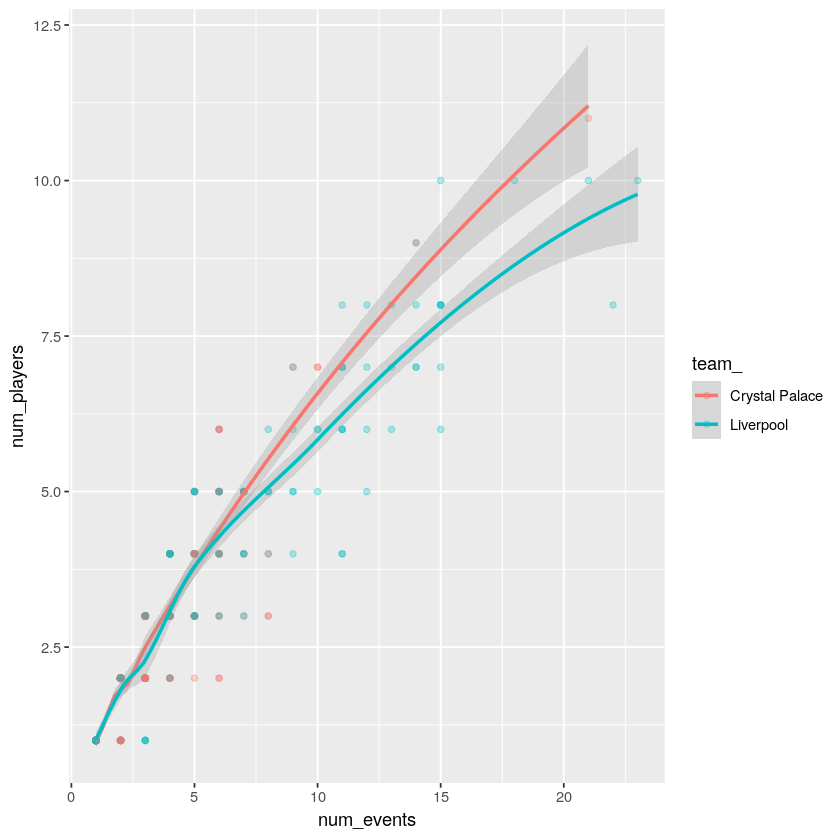

In [35]:
ggplot() +
  geom_point(aes(num_events, num_players, color=team_), alpha=0.3) +
  geom_smooth(aes(num_events, num_players, color=team_), alpha=0.3)

In [257]:
summary <- data.frame(goal_seqs, num_events, num_players, num_events/num_players)

ERROR: Error in data.frame(goal_seqs, num_events, num_players): arguments imply differing number of rows: 988, 1551


In [ ]:
summary[summary$num_events> 10,]

In [225]:
df <- events[events$possession==goal_seqs[18],]
df[(nrow(df)-4):nrow(df),]

,X,matchId,matchPeriod,team,source,eventName,subEventName,tags,accurate,in_play,⋯,to_team,location_x,location_y,target_x,target_y,minute,seconds,time,home_or_away,FirstXI
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>
181414,181413,2499828,1H,Liverpool,Roberto Firmino,Challenge,Air duel,"['counter attack', 'won', 'accurate', nan, nan, nan]",1,25,⋯,Away,10.50,37.40,27.30,28.56,20,46,20:46,Away,True
181416,181415,2499828,1H,Liverpool,Mohamed Salah,Pass,Simple pass,"['counter attack', 'accurate', nan, nan, nan, nan]",1,25,⋯,Away,27.30,28.56,40.95,48.28,20,48,20:48,Away,True
181417,181416,2499828,1H,Liverpool,S. Mané,On the Ball,Acceleration,"['counter attack', 'accurate', nan, nan, nan, nan]",1,25,⋯,Away,40.95,48.28,76.65,42.16,20,49,20:49,Away,True
181418,181417,2499828,1H,Liverpool,S. Mané,Pass,Simple pass,"['assist', 'counter attack', 'accurate', nan, nan, nan]",1,25,⋯,Away,76.65,42.16,93.45,30.60,20,54,20:54,Away,True
181419,181418,2499828,1H,Liverpool,Mohamed Salah,Shot,Goal,"['goal', 'counter attack', 'left foot', 'opportunity', 'position: goal low right', 'accurate']",1,25,⋯,Away Goal,93.45,30.60,105.00,34.00,20,57,20:57,Away,True


In [206]:
nrow(df)

[1] 11

In [104]:
# id <- '2499923-98-Liv-0'
# id <- '2499763-29-Liv-2'

In [226]:
table <- events[233393:233405,]

df <- data.frame(table$matchPeriod, table$time, table$team, table$subEventName, table$source)

names(df) <- c('Half', 'Time', 'Team', 'Event Description', 'Player')

kable(df)



|Half |Time  |Team       |Event Description |Player                |
|:----|:-----|:----------|:-----------------|:---------------------|
|1H   |15:57 |Stoke City |Clearance         |M. Diouf              |
|1H   |16:03 |Liverpool  |Simple pass       |S. Mané               |
|1H   |16:06 |Liverpool  |Simple pass       |Alberto Moreno        |
|1H   |16:09 |Liverpool  |Simple pass       |D. Lovren             |
|1H   |16:13 |Liverpool  |Simple pass       |G. Wijnaldum          |
|1H   |16:16 |Liverpool  |Simple pass       |E. Can                |
|1H   |16:18 |Liverpool  |Simple pass       |G. Wijnaldum          |
|1H   |16:22 |Liverpool  |Simple pass       |J. Matip              |
|1H   |16:27 |Liverpool  |Simple pass       |A. Oxlade-Chamberlain |
|1H   |16:28 |Liverpool  |Cross             |J. Gomez              |
|1H   |16:31 |Liverpool  |Smart pass        |D. Solanke            |
|1H   |16:33 |Liverpool  |Goal              |S. Mané               |
|1H   |16:38 |Stoke City |Reflex

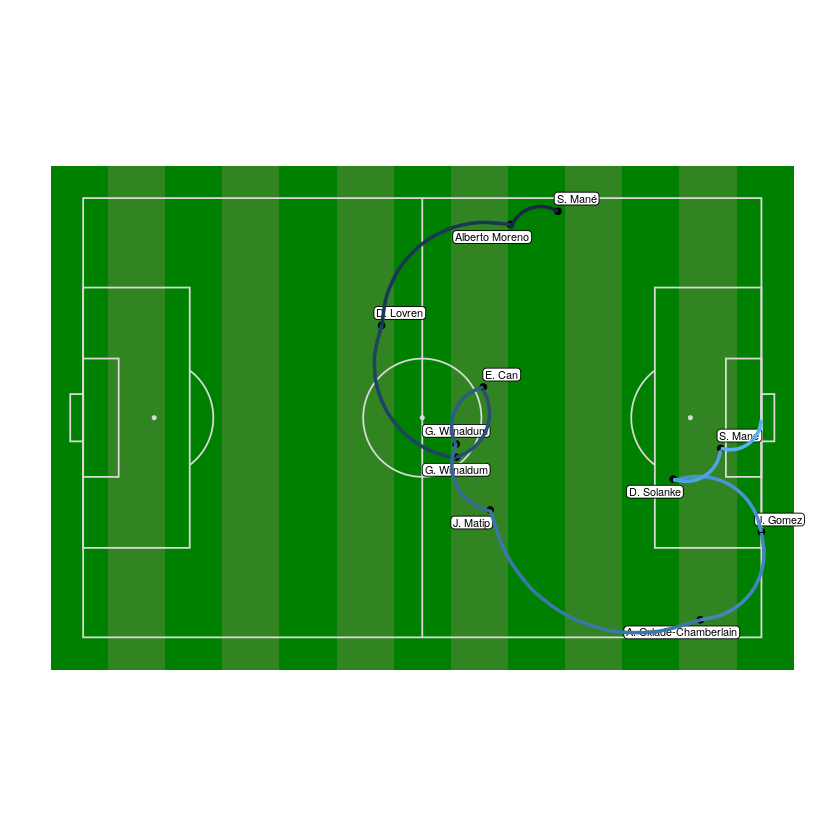

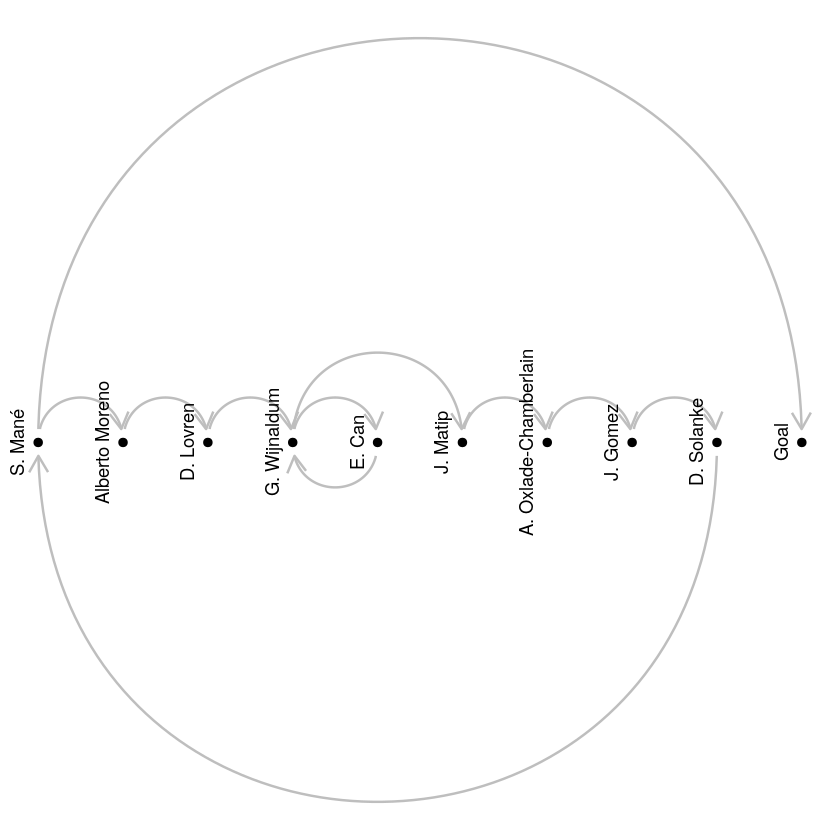

In [104]:
id <- '2499858-18-Liv-5'
data <- events[events$possession == id,]

soccerPitch(theme='grass') + geom_point(data = data,
               aes(location_x , location_y)) + 
    geom_label_repel(data = data, aes(location_x, location_y, label = source), label.padding=0.1, size=2.3, alpha=1) +
 geom_curve(data = data,
              aes(x = location_x, xend = target_x, y = location_y, yend = target_y*.99, col = X), show.legend=FALSE, size=1, alpha = 1)

nodes <- unique(c(as.character(data$source),as.character(data$target)))
edges <- data.frame(data$source, data$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
ggraph(g, layout='linear') + 
    geom_edge_arc(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name)), 
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey', linetype='dashed') +
    geom_node_point(size=2, color='black', fill='white') +
    geom_node_text(aes(label = name), repel=T, angle=90, hjust=2, ) +
    theme_void()

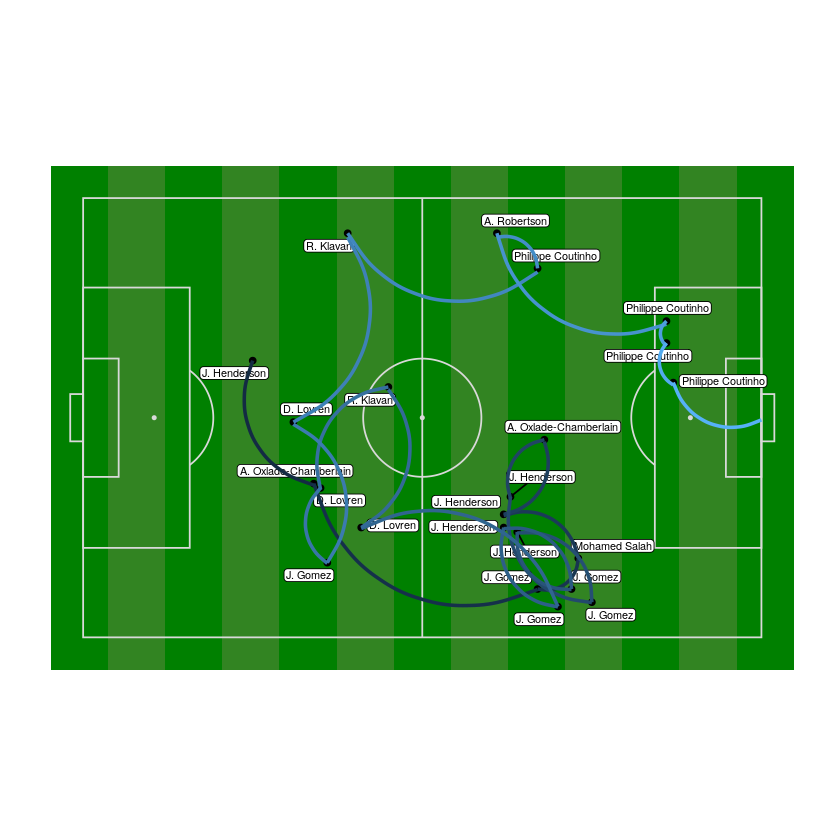

In [105]:
id <-  '2499889-18-Liv-0'
data <- events[events$possession == id,]

soccerPitch(theme='grass') + geom_point(data = data,
               aes(location_x , location_y)) + 
    geom_label_repel(data = data, aes(location_x, location_y, label = source), label.padding=0.1, size=2.3, alpha=1) +
 geom_curve(data = data,
              aes(x = location_x, xend = target_x, y = location_y, yend = target_y*.99, col = X), show.legend=FALSE, size=1, alpha = 1)

<img src="../figures/youtube_clip2.gif">

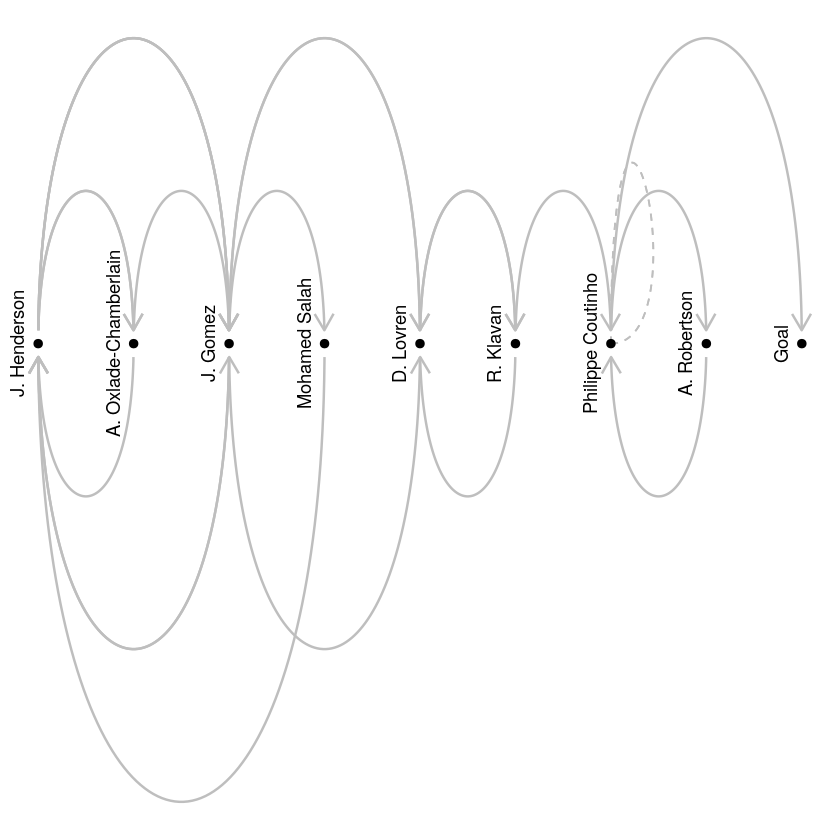

In [106]:
nodes <- unique(c(as.character(data$source),as.character(data$target)))
edges <- data.frame(data$source, data$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
ggraph(g, layout='linear') + 
    geom_edge_arc(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name)), 
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey', linetype='dashed') +
    geom_node_point(size=2, color='black', fill='white') +
    geom_node_text(aes(label = name), repel=T, angle=90, hjust=2, ) +
    theme_void()

In [97]:
edge_density(g)

[1] 0.3194444

In [30]:
vector

[1] 1 1 1

In [15]:
length(unique(events[events$possession == goal_seqs[1],]$source))

[1] 6

In [ ]:
# draw mean position team passing network

In [125]:
events[1,]

,X,matchId,matchPeriod,team,source,eventName,subEventName,tags,accurate,in_play,⋯,to_team,location_x,location_y,target_x,target_y,minute,seconds,time,home_or_away,FirstXI
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>
1,0,2499719,1H,Arsenal,A. Lacazette,Pass,Simple pass,"['accurate', nan, nan, nan, nan, nan]",1,0,⋯,Home,51.45,34.68,32.55,14.96,0,2,00:02,Home,True


In [42]:
drawpassmap <- function(game_id) {

game <- events[events$matchId == game_id,]
firstXI <- game[game$FirstXI == 'True',]
mean_positions <- firstXI[firstXI$location_x>0 & firstXI$location_y>0 & firstXI$location_x<105 & firstXI$location_y<68,] %>% 
    group_by(team, matchId, source) %>%
      dplyr::summarise(x_mean = mean(location_x), y_mean = mean(location_y)) %>% 
      ungroup() %>%
      mutate(team = as.factor(team), id = as.factor(matchId)) %>%
      as.data.frame()

pass_counts <- ddply(data.frame(game$source, game$target),.(game.source,game.target),nrow)
names(pass_counts) <- c('source','target','passcount')
c1 <- merge(mean_positions, pass_counts, by='source')
c0 <- c1[,c(1,4,5,7,8)]
names(c0)[2:3] <- c('source_x','source_y')
names(mean_positions)[3] <- 'target'
c2 <- merge(mean_positions, c0, by='target')
liv <- c2[c2$team=='Liverpool',]

return (soccerPitch() +
    geom_segment(data=liv[liv$passcount>=5,], size=1, colour='red',
                 aes(x=source_x, y=source_y, xend=x_mean, yend=y_mean, alpha=passcount)) +
    geom_segment(data=liv[liv$passcount>=10,], size=1.5, colour='black',
                 aes(x=source_x, y=source_y, xend=x_mean, yend=y_mean, alpha=passcount)) +
    geom_label_repel(data = mean_positions[mean_positions$team=='Liverpool',], 
                     aes(x_mean, y_mean, label = target), label.padding=0.1, size=2.3, alpha=1) +
    geom_point(data=liv, aes(x_mean, y_mean,), fill='red', colour='black', pch=21, size=3) 
        )
}

,X,matchId,matchPeriod,team,source,eventName,subEventName,tags,accurate,in_play,⋯,to_team,location_x,location_y,target_x,target_y,minute,seconds,time,home_or_away,FirstXI
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>
529813,529812,2500032,1H,Liverpool,J. Matip,Challenge,Air duel,"['lost', 'not accurate', nan, nan, nan, nan]",0,0,⋯,Away,32.55,15.64,14.70,3.40,0,12,00:12,Away,True
529815,529814,2500032,1H,Liverpool,T. Alexander-Arnold,Pass,Launch,"['accurate', nan, nan, nan, nan, nan]",1,0,⋯,Away,14.70,3.40,59.85,12.92,0,15,00:15,Away,True
529817,529816,2500032,1H,Liverpool,Roberto Firmino,Challenge,Air duel,"['lost', 'not accurate', nan, nan, nan, nan]",0,0,⋯,Away,59.85,12.92,39.90,17.68,0,19,00:19,Away,True
529818,529817,2500032,1H,Liverpool,J. Milner,Pass,Simple pass,"['accurate', nan, nan, nan, nan, nan]",1,0,⋯,Away,39.90,17.68,32.55,14.96,0,21,00:21,Away,True
529819,529818,2500032,1H,Liverpool,J. Henderson,Pass,Head pass,"['accurate', nan, nan, nan, nan, nan]",1,0,⋯,Away,32.55,14.96,44.10,13.60,0,22,00:22,Away,True
529820,529819,2500032,1H,Liverpool,G. Wijnaldum,Challenge,Air duel,"['lost', 'not accurate', nan, nan, nan, nan]",0,0,⋯,Home,44.10,13.60,45.15,2.72,0,23,00:23,Away,True
529826,529825,2500032,1H,Liverpool,T. Alexander-Arnold,Free Kick,Throw in,"['not accurate', nan, nan, nan, nan, nan]",0,1,⋯,Home,22.05,0.00,42.00,4.76,0,47,00:47,Away,True
529830,529829,2500032,1H,Liverpool,T. Alexander-Arnold,Free Kick,Throw in,"['accurate', nan, nan, nan, nan, nan]",1,2,⋯,Away,32.55,0.00,51.45,3.40,1,8,01:08,Away,True
529831,529830,2500032,1H,Liverpool,G. Wijnaldum,Pass,Simple pass,"['accurate', nan, nan, nan, nan, nan]",1,2,⋯,Away,51.45,3.40,36.75,4.08,1,9,01:09,Away,True


`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


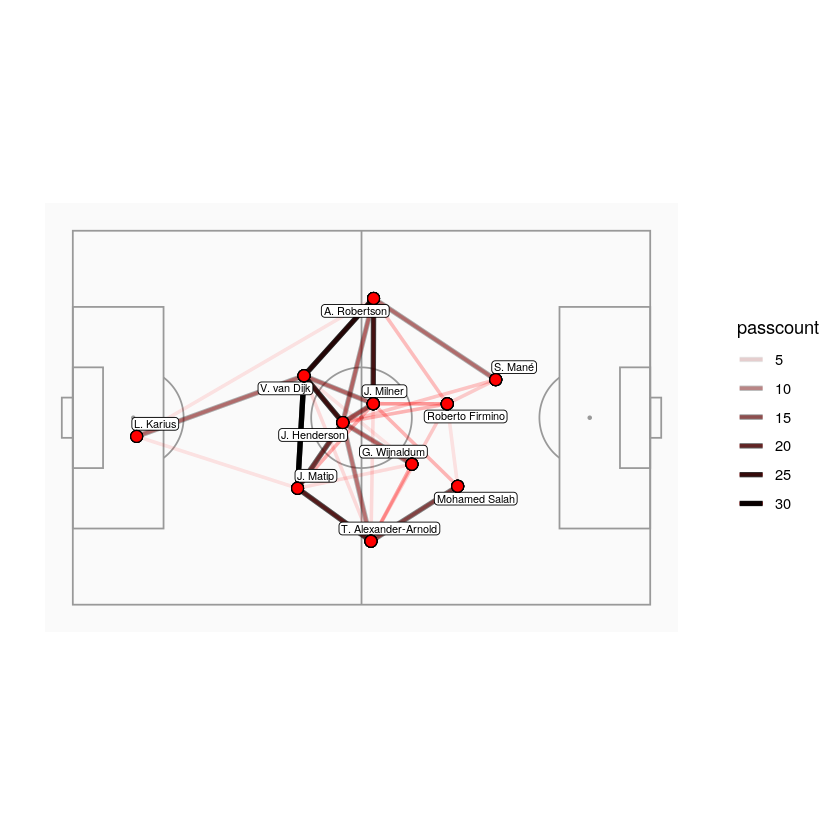

In [43]:
game_id <- '2500032'
drawpassmap(game_id)

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


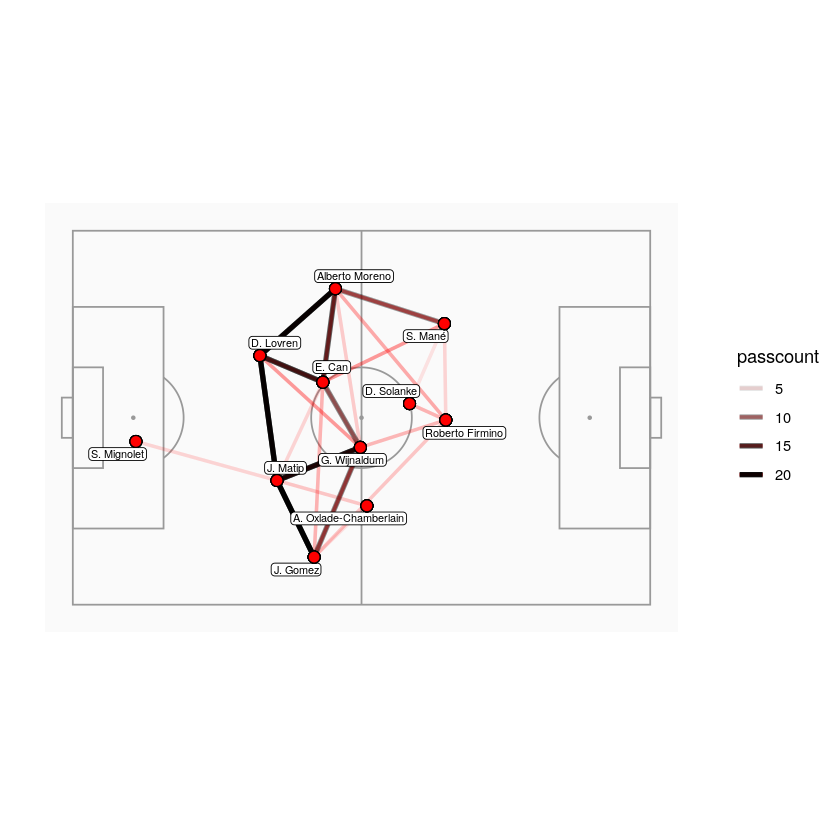

In [135]:
game_id <- '2499858'

drawpassmap(game_id)

In [115]:
liv_matches <- unique(events[events$team == 'Liverpool',]$matchId)

In [149]:
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)
`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)
`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


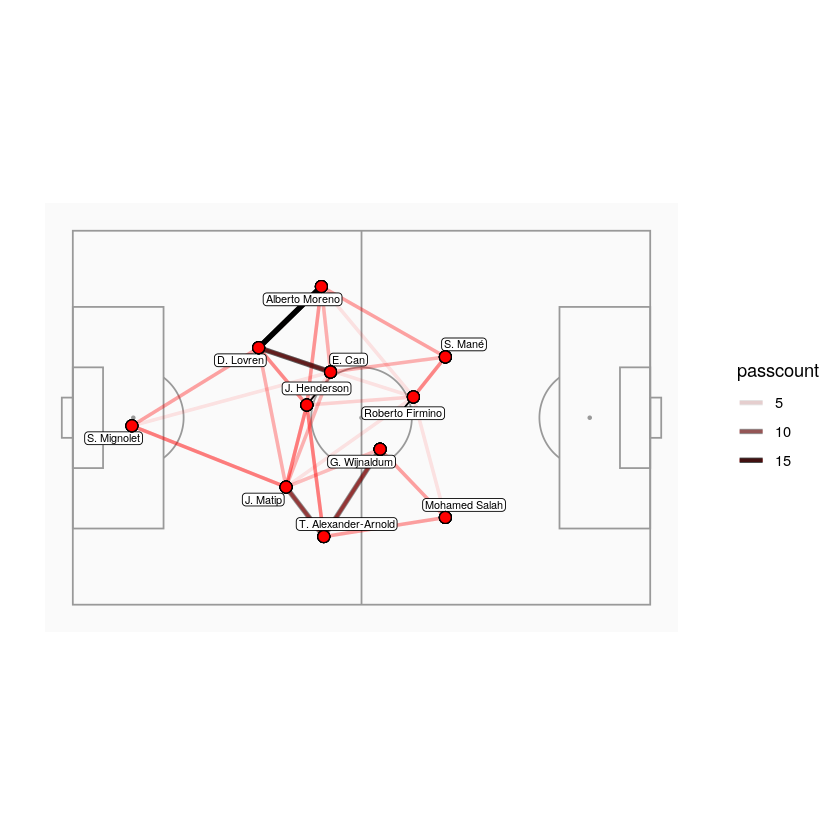

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


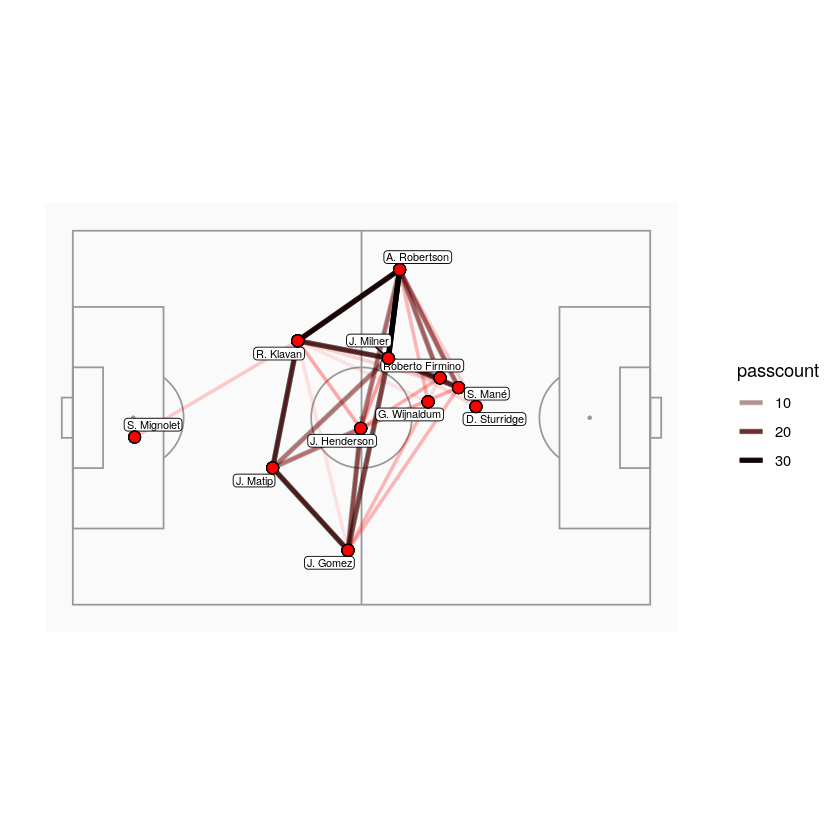

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


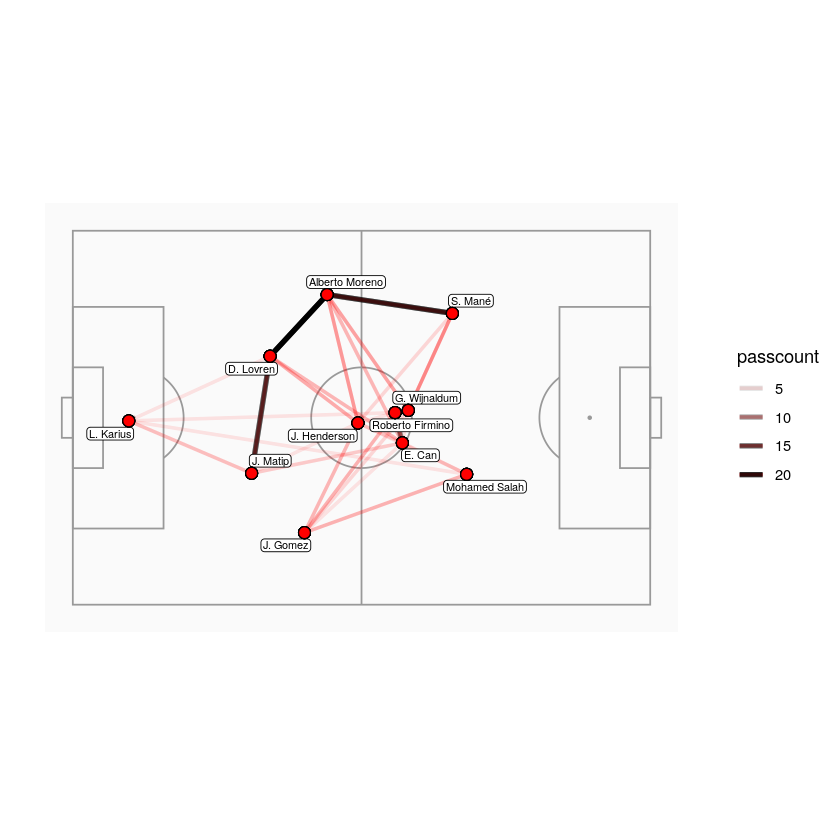

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


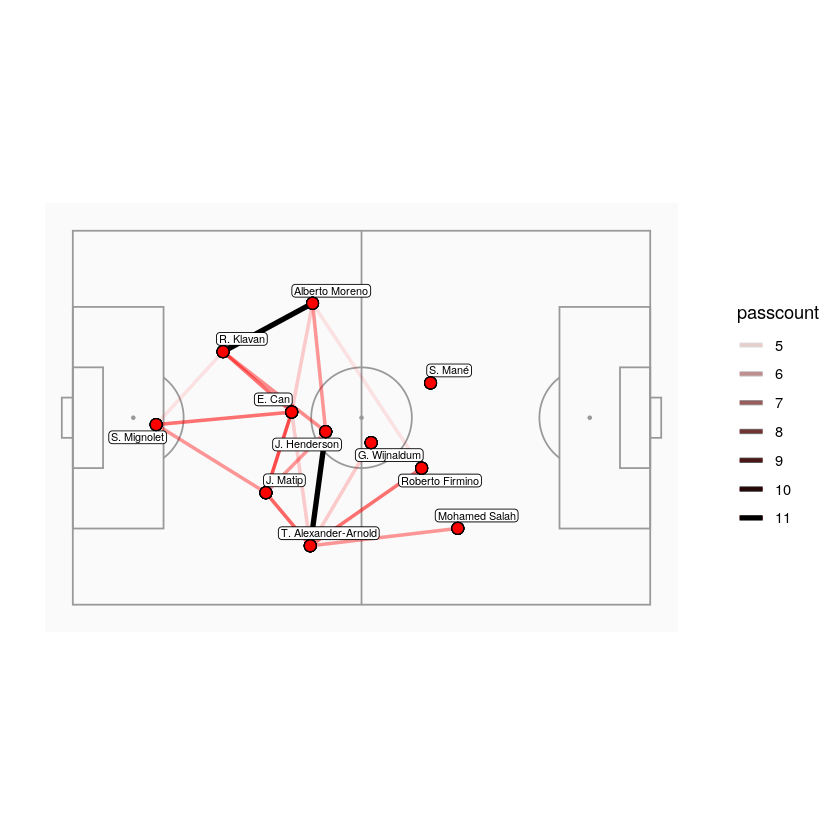

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


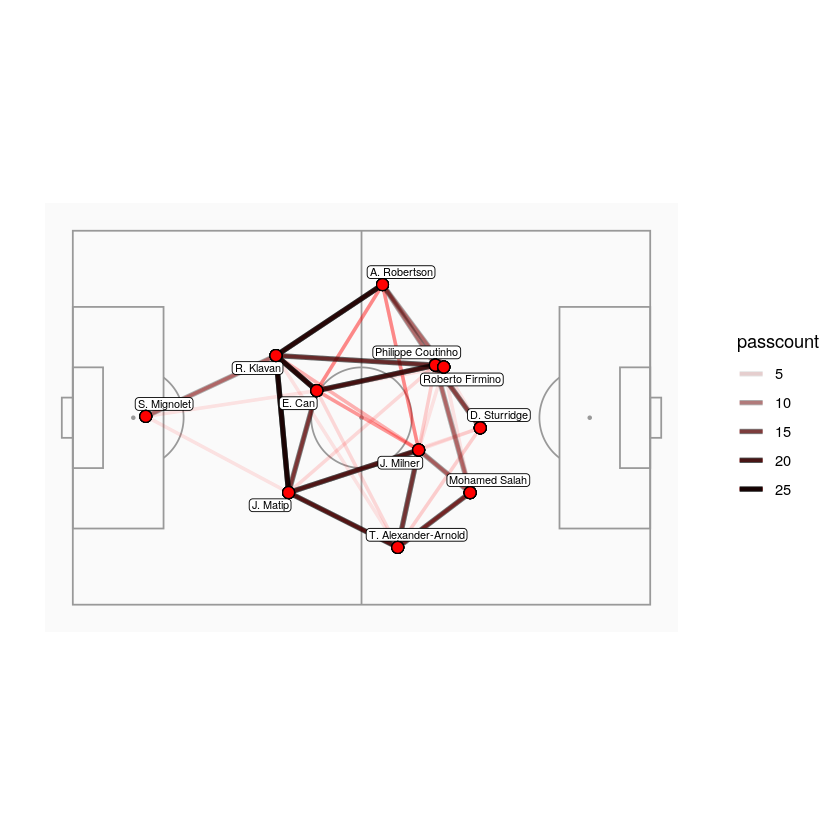

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


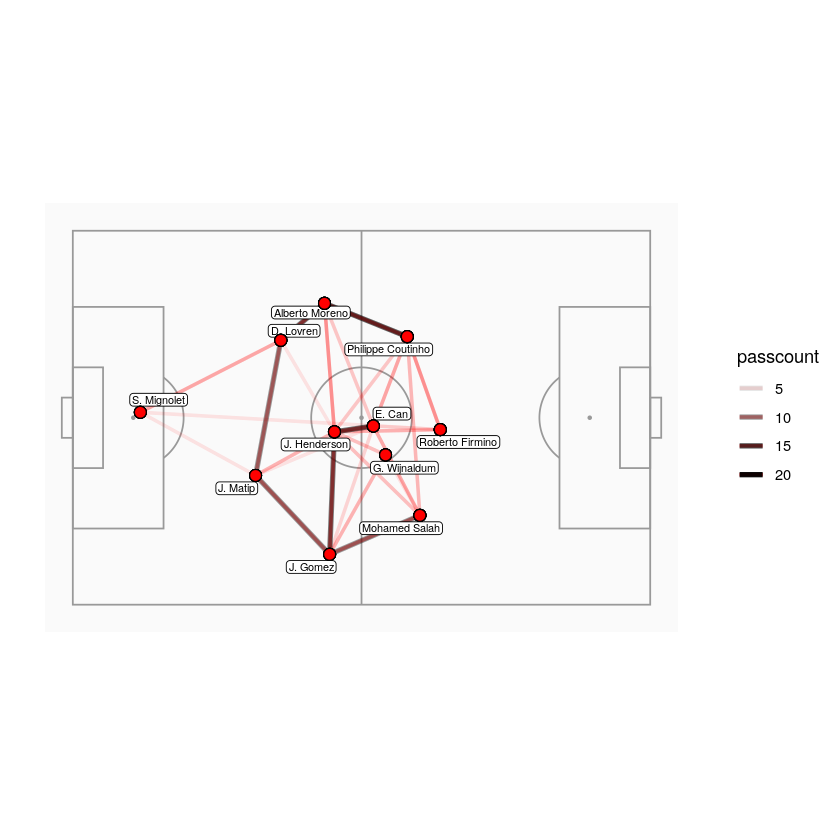

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


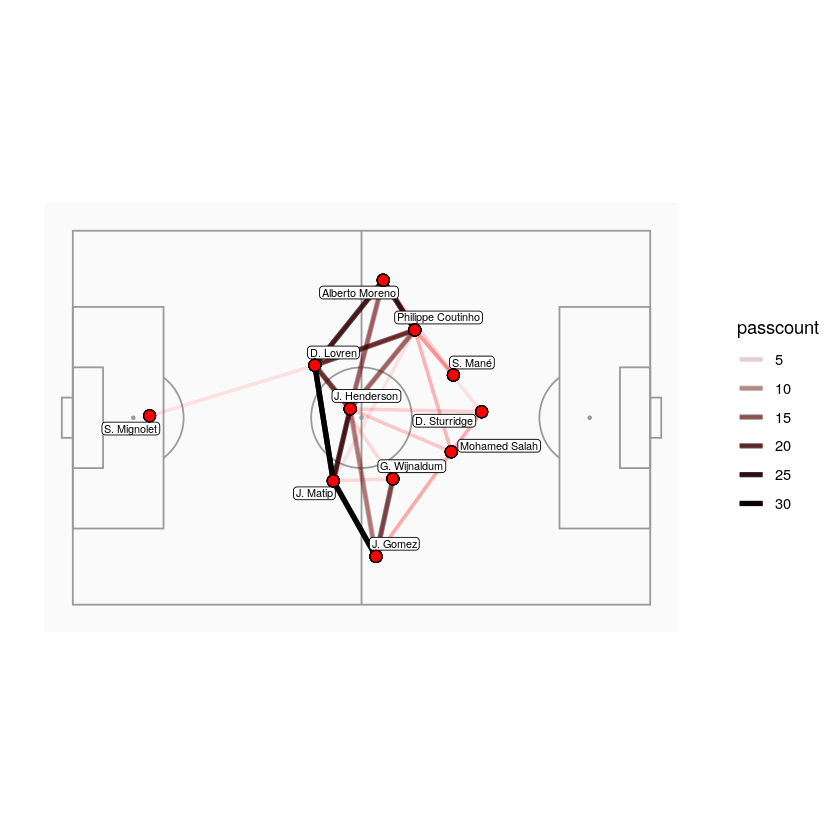

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


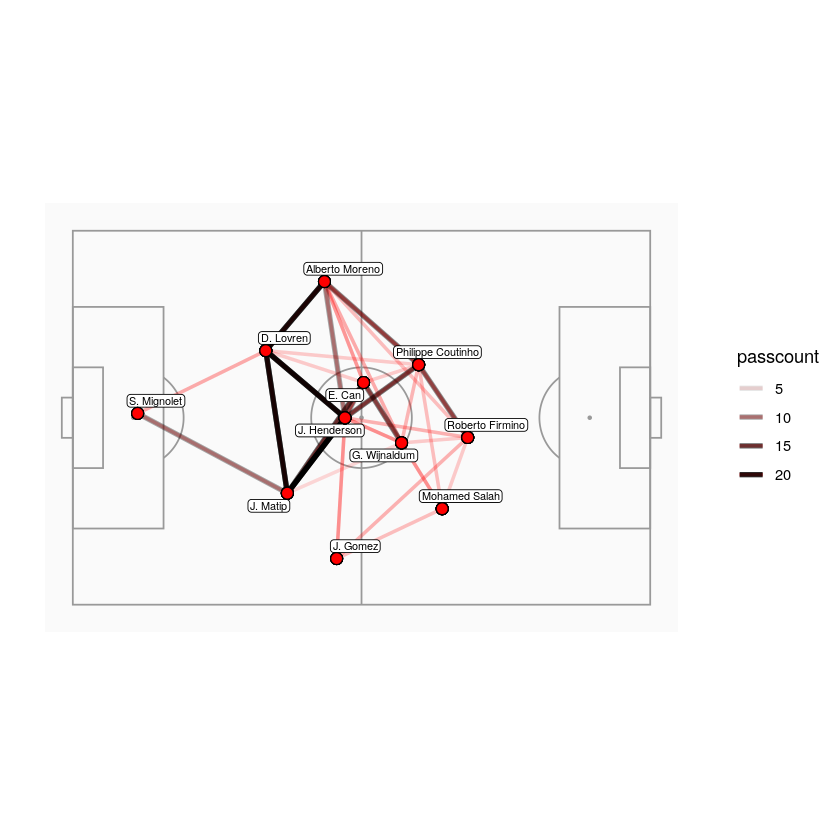

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


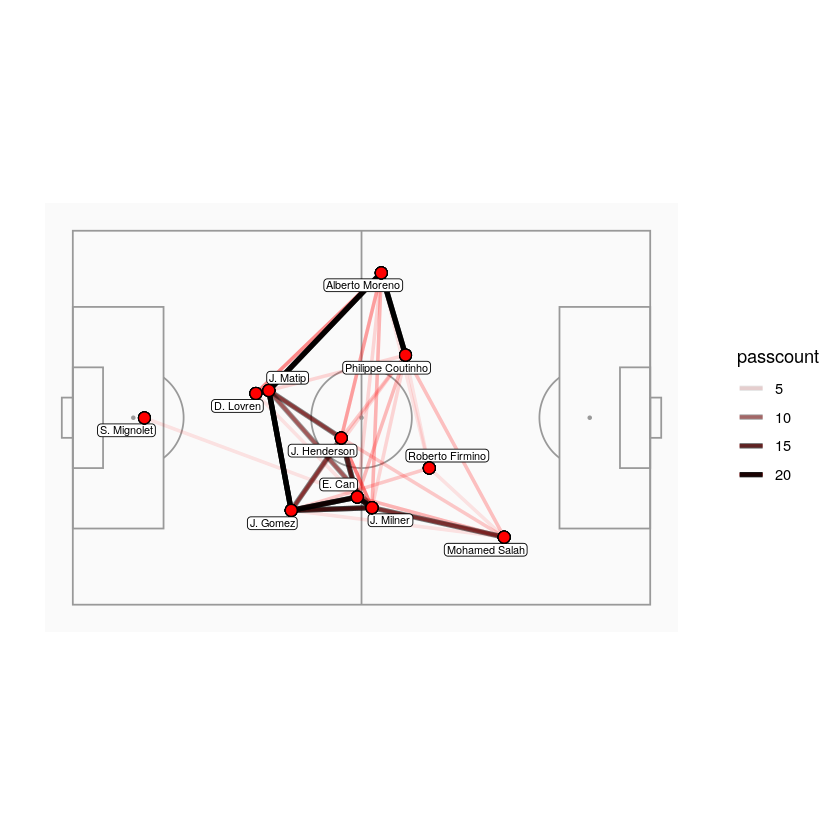

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


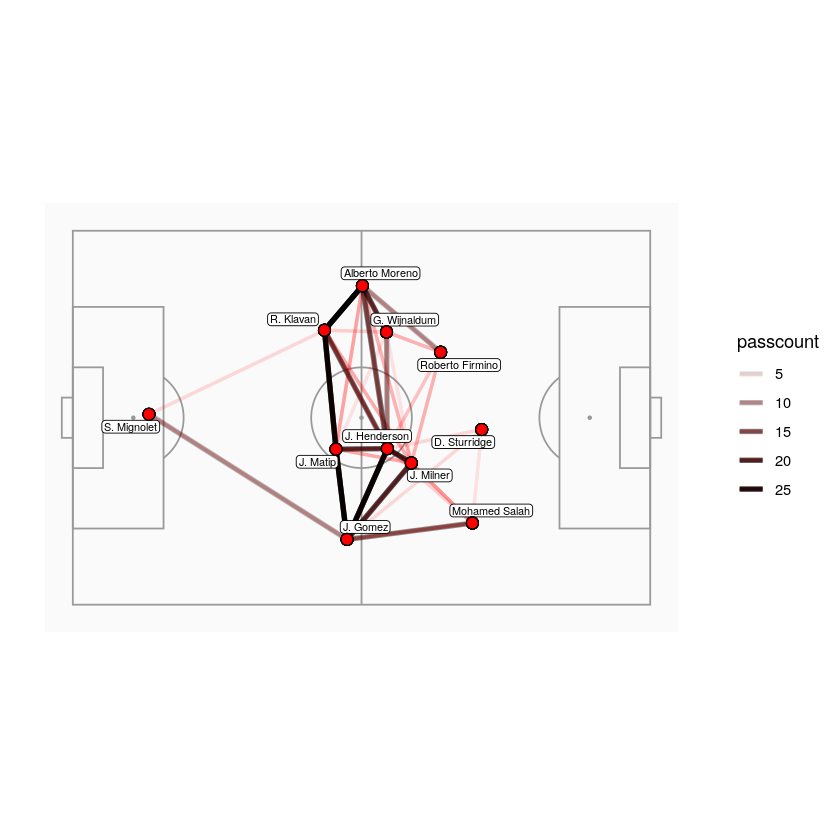

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


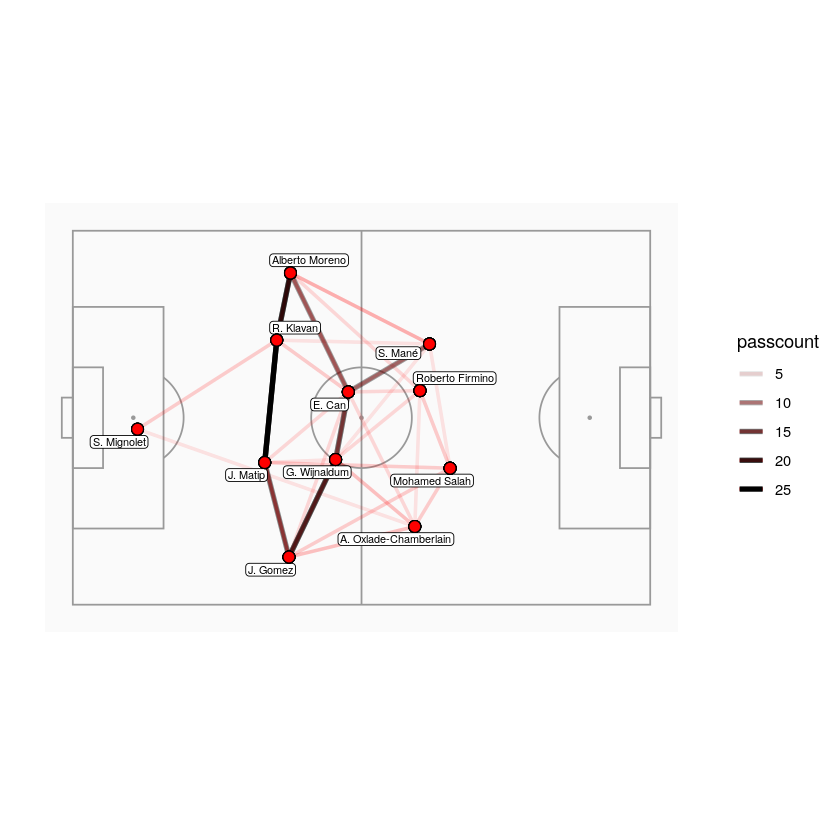

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


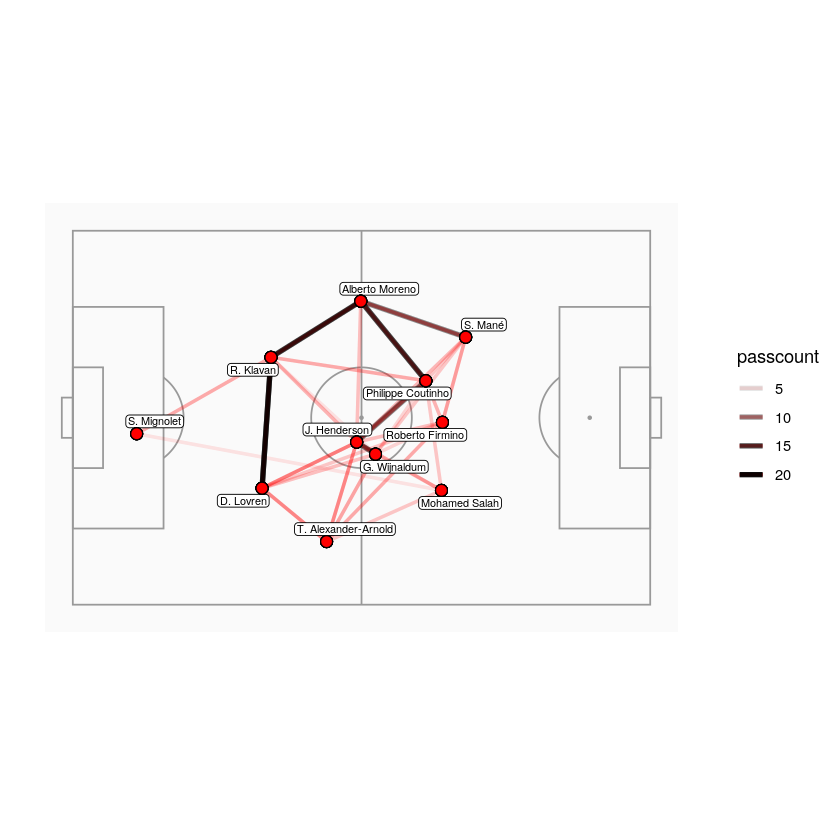

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


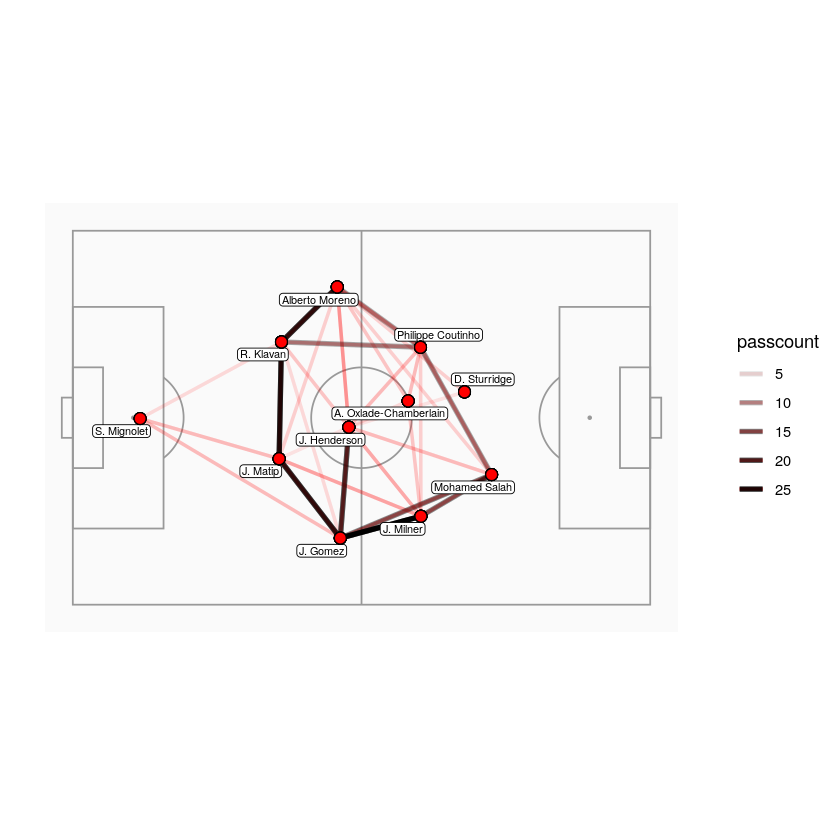

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


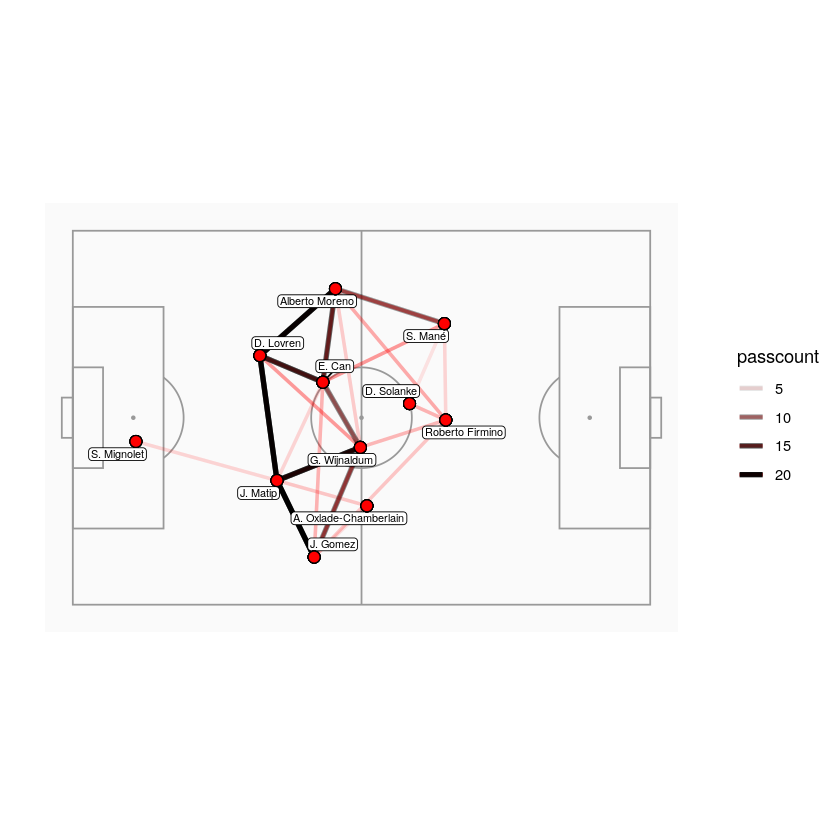

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


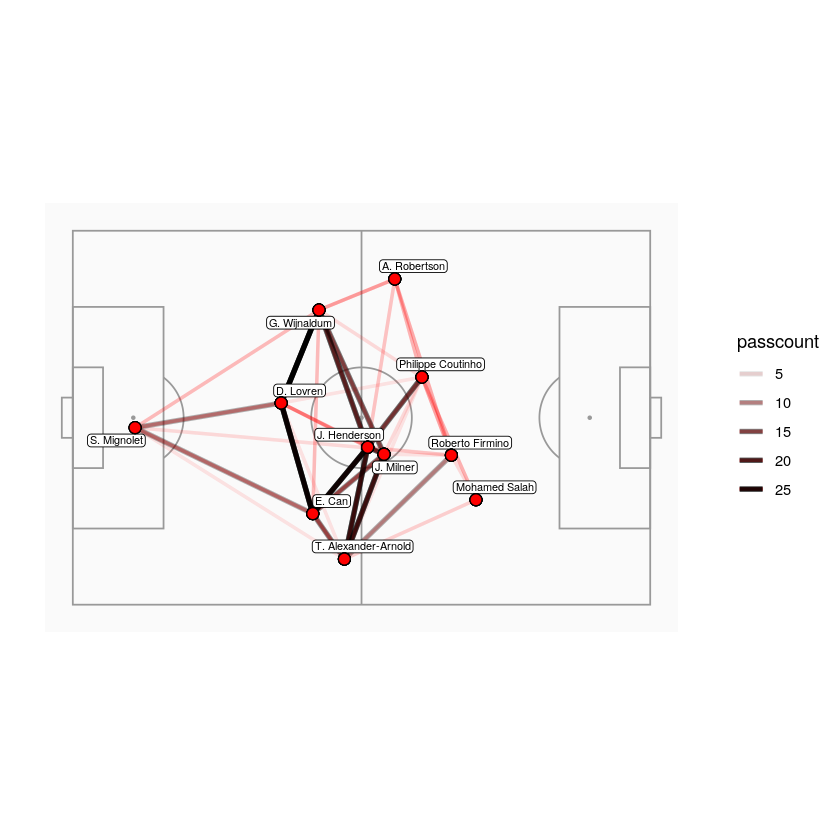

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


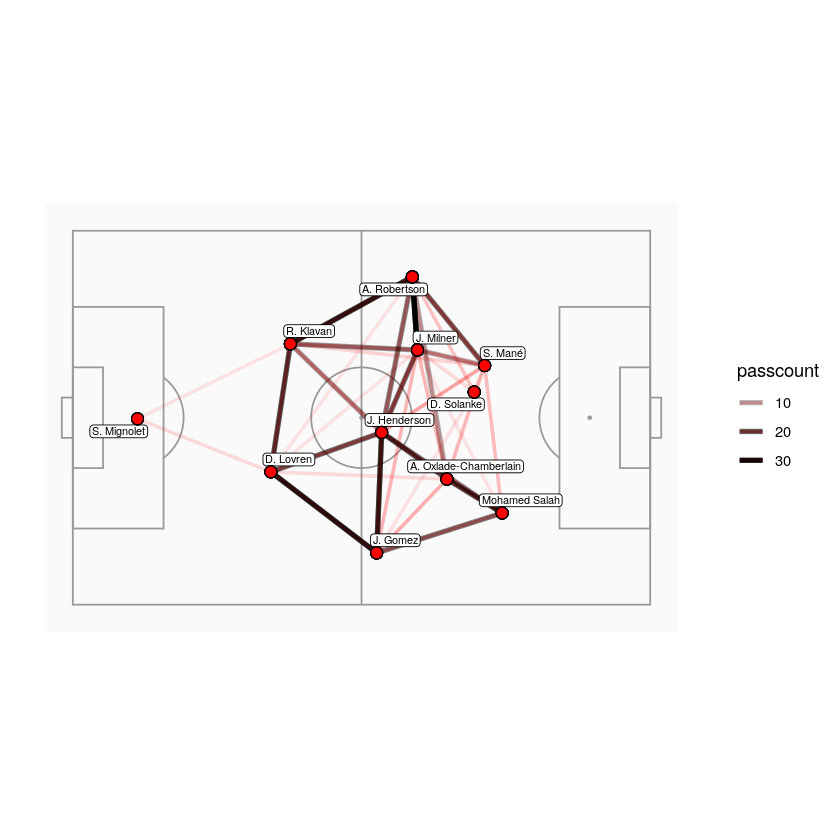

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


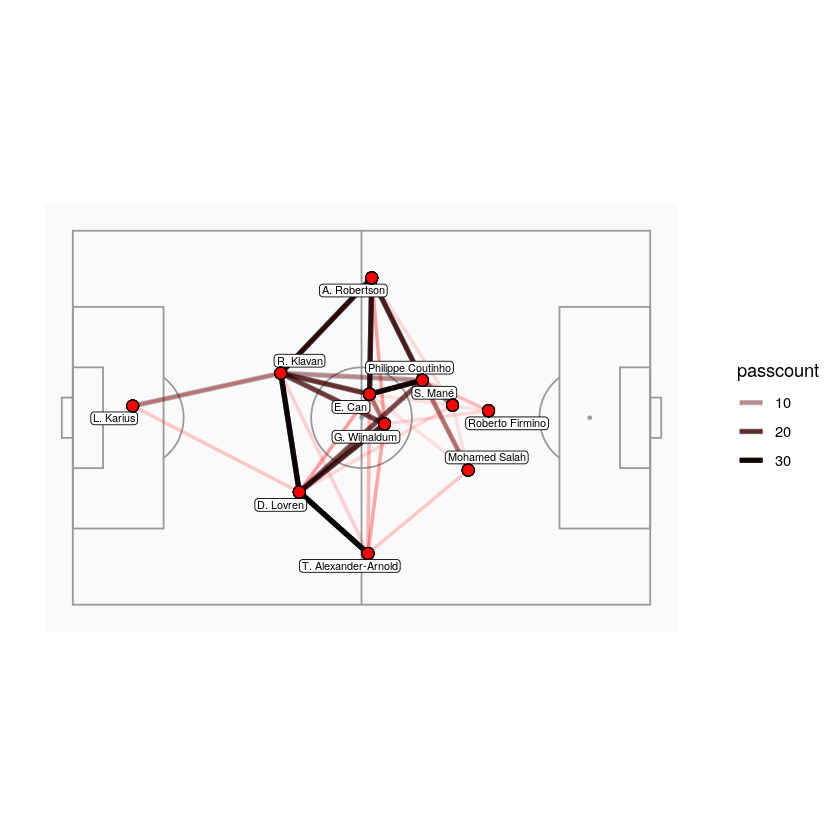

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


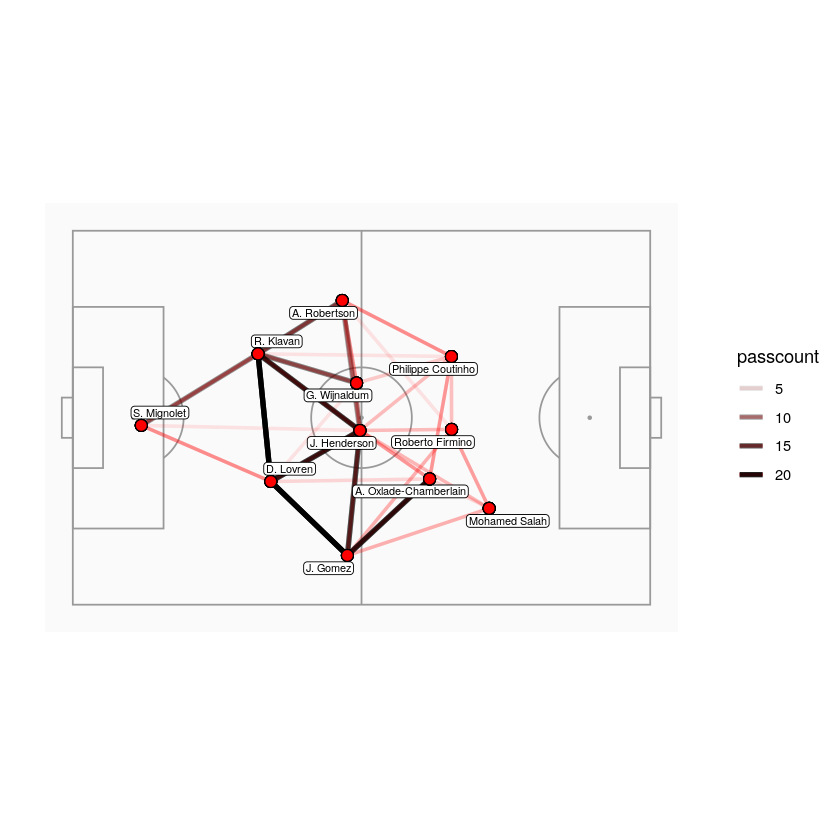

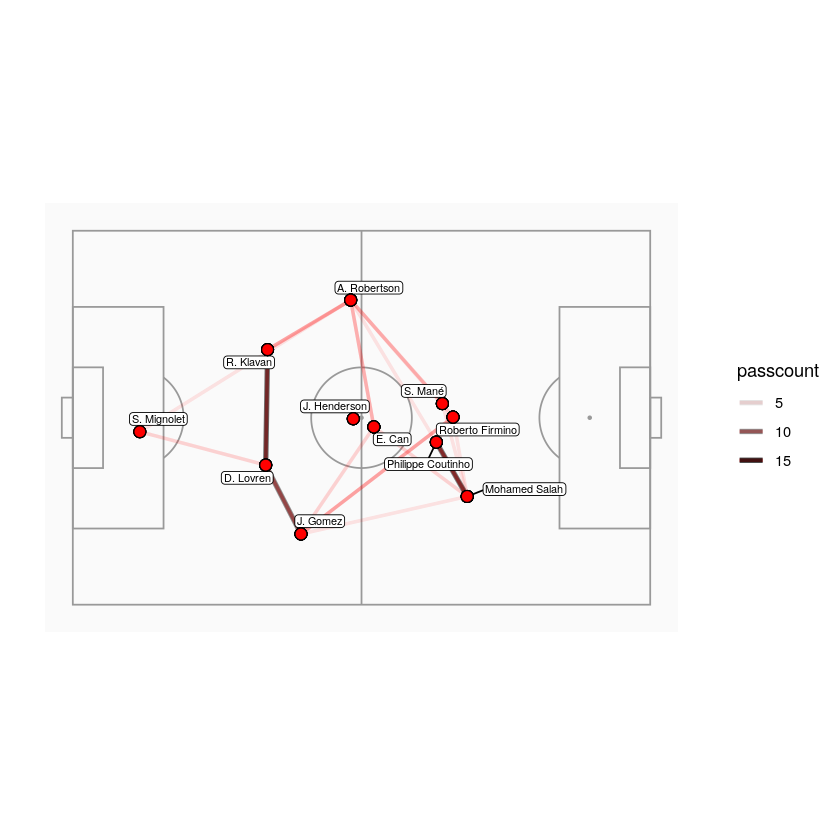

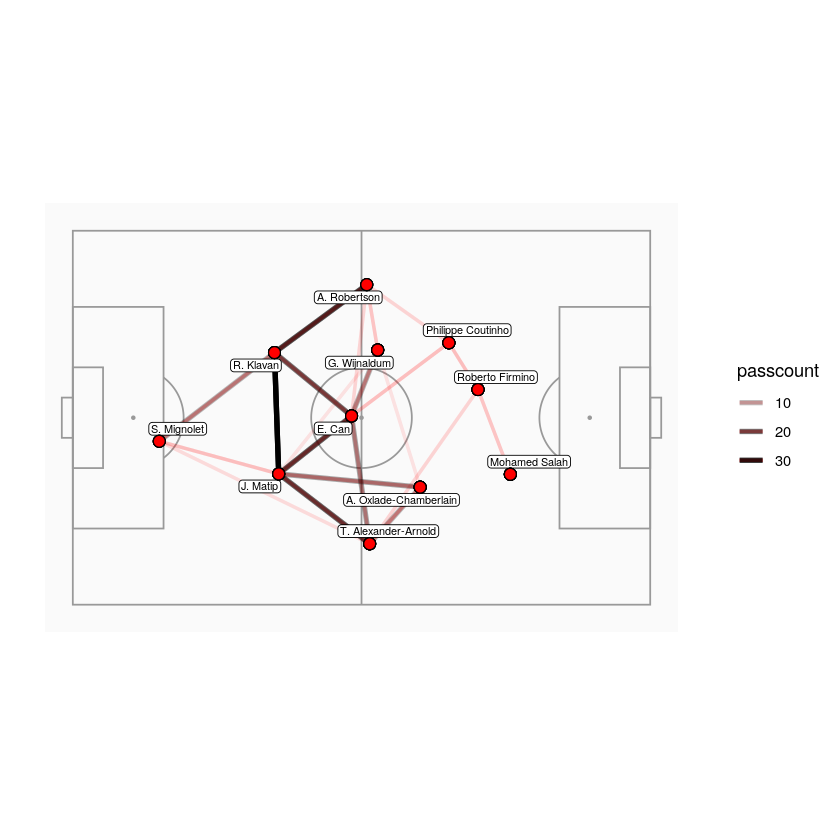

In [156]:
for (i in 1:20) { print(drawpassmap(liv_matches[i]))}

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)
`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)
`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


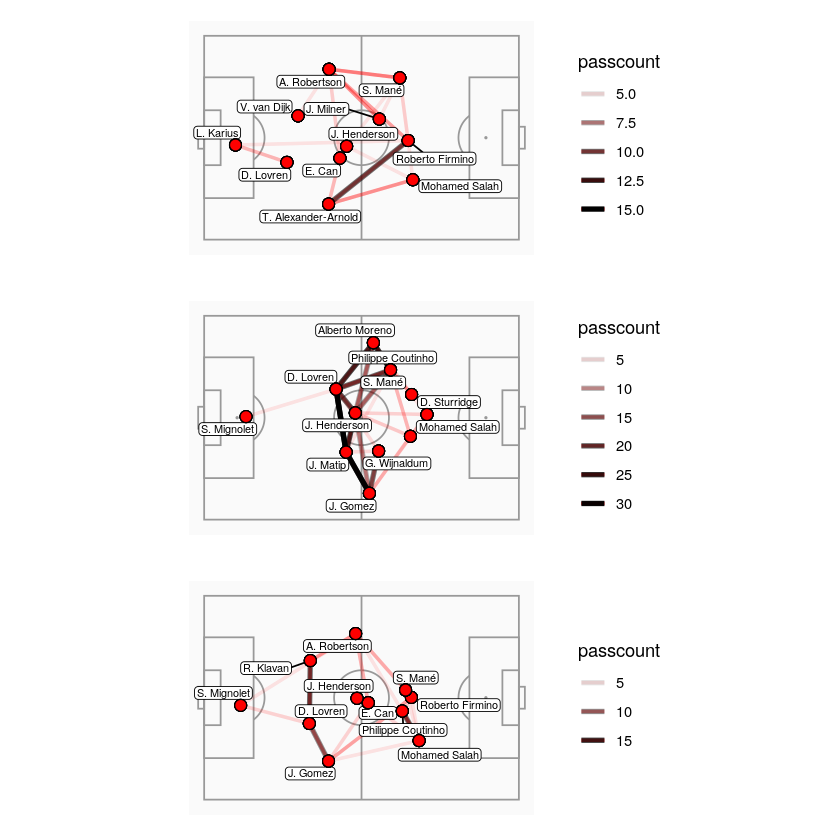

In [154]:
grid.arrange(drawpassmap(liv_matches[26]), drawpassmap(liv_matches[7]), drawpassmap(liv_matches[19]), nrow=3)



|                    | page_rank.g..vector...100| centr_eigen.g..vector...100| hub_score.g..vector...100| authority_score.g..vector...100|
|:-------------------|-------------------------:|---------------------------:|-------------------------:|-------------------------------:|
|J. Milner           |                 11.150101|                    91.87500|                 100.00000|                        95.29368|
|Roberto Firmino     |                 12.476003|                    71.60981|                  64.69179|                        84.86866|
|J. Henderson        |                 13.652823|                   100.00000|                  97.11699|                       100.00000|
|L. Karius           |                  3.171287|                    28.27790|                  26.49274|                        30.96941|
|S. Mané             |                  8.403017|                    48.50874|                  49.96332|                        49.94581|
|V. van Dijk         |   

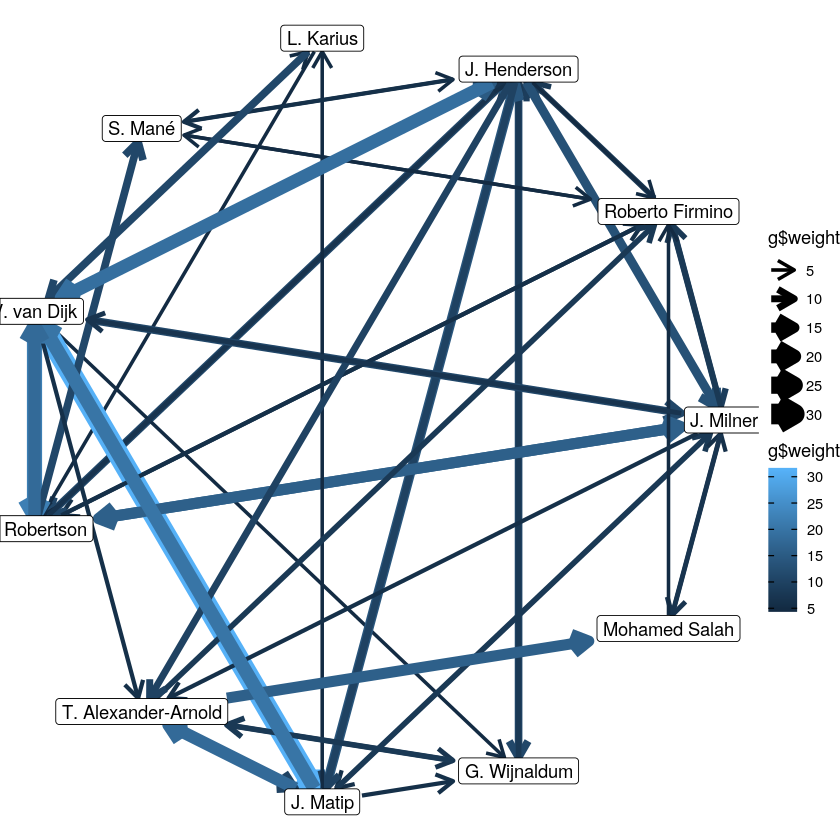

In [515]:
df <- liv[liv$passcount>=5,]#>5,]
nodes <- unique(c(as.character(df$source)))
edges <- data.frame(df$source, df$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)

print(kable(data.frame(page_rank(g)$vector*100, centr_eigen(g)$vector*100, hub_score(g)$vector*100, authority_score(g)$vector*100)))
g$weight <- df$passcount
ggraph(g, layout='circle') + 
    geom_edge_link(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name),
                     color = g$weight, width=g$weight), 
                  arrow=arrow(length=unit(4,'mm')), ) +
    geom_node_label(aes(label = name), ) +
    theme_void()

In [518]:
g[]

   [[ suppressing 11 column names ‘J. Milner’, ‘Roberto Firmino’, ‘J. Henderson’ ... ]]


11 x 11 sparse Matrix of class "dgCMatrix"
                                         
J. Milner           1 1 1 . . 1 1 1 1 . 1
Roberto Firmino     1 1 1 . 1 . 1 . . . .
J. Henderson        1 1 . . 1 1 1 1 1 1 .
L. Karius           . . . . . 1 1 . . . .
S. Mané             . 1 1 . 1 . 1 . . . .
V. van Dijk         1 . 1 1 . 1 1 1 1 1 .
A. Robertson        1 1 1 . 1 1 1 . . . .
T. Alexander-Arnold . 1 1 . . . . 1 1 1 1
J. Matip            1 . 1 1 . 1 . 1 1 1 .
G. Wijnaldum        . . 1 . . . . 1 . 1 .
Mohamed Salah       1 1 . . . . . . . . 1

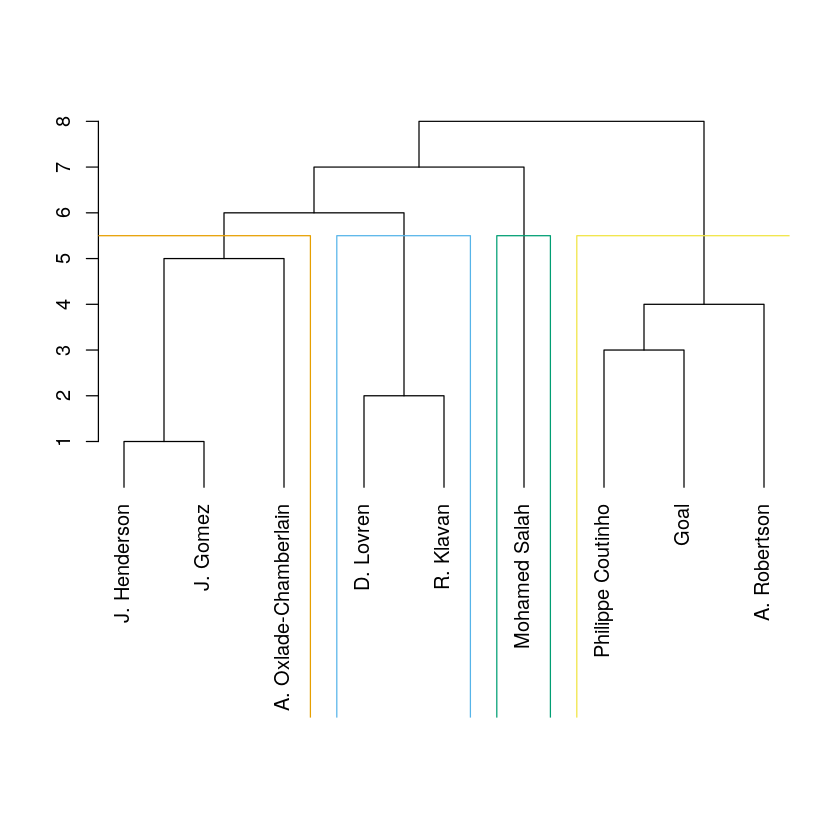

In [178]:
fc <- cluster_edge_betweenness(g)
plot_dendrogram(fc)

In [511]:
# assess network metrics: centrality, pagerank, ...
keywords: graph, network, nodes, edges, degree, adjacency matrix, closeness = reciprocal of average distance to other vertices,
betweenness = number of shortest paths going through a vertex
eigenvector centrality = number of adjacent edges weighted by their 'goodness' (??)
Burt's constraint ~ benefit of brokering between other actors
transitivity ~ are my friends friends of each other
sensitivity of centrality measures ~ remove and add two random nodes
finding community structure in very large networks. fast-greedy algorithm
spinglass algorithm ~ community mechanics of community detection

pagerank
clustering
maximal cliquee
@JPenaTouchette2012

ERROR: Error in parse(text = x, srcfile = src): <text>:2:16: unexpected ','
1: # assess network metrics: centrality, pagerank, ...
2: keywords: graph,
                  ^


In [526]:
pos_seqs <- unique(events[events$team=='Liverpool',]$possession)

In [532]:
tail(events[events$possession == id,],1)$subEventName

[1] Goal
37 Levels:  Acceleration Air duel Ball out of the field Clearance ... Whistle

In [509]:
data.frame(page_rank(g)$vector*100, centr_eigen(g)$vector*100, hub_score(g)$vector*100, authority_score(g)$vector*100)

,page_rank.g..vector...100,centr_eigen.g..vector...100,hub_score.g..vector...100,authority_score.g..vector...100
,<dbl>,<dbl>,<dbl>,<dbl>
J. Milner,11.150101,91.87500,100.00000,95.29368
Roberto Firmino,12.476003,71.60981,64.69179,84.86866
J. Henderson,13.652823,100.00000,97.11699,100.00000
L. Karius,3.171287,28.27790,26.49274,30.96941
S. Mané,8.403017,48.50874,49.96332,49.94581
V. van Dijk,8.836602,83.65591,96.52270,82.95901
A. Robertson,11.874402,79.24296,77.51382,88.44988
T. Alexander-Arnold,9.514667,69.92582,69.02973,83.58909
J. Matip,7.154509,74.18965,82.85201,76.92019


In [469]:
page_rank(g)$vector*100

J. Milner     Roberto Firmino        J. Henderson           L. Karius 
          11.150101           12.476003           13.652823            3.171287 
            S. Mané         V. van Dijk        A. Robertson T. Alexander-Arnold 
           8.403017            8.836602           11.874402            9.514667 
           J. Matip        G. Wijnaldum       Mohamed Salah 
           7.154509            8.329968            5.436622

In [ ]:
# draw general markov graph: goal-home-away-goal

In [9]:
nodes <- unique(c(as.character(events$to_team)))

In [10]:
c('Kick Off', nodes)

[1] "Kick Off"  "Home"      "Away"      "Home Goal" "Away Goal"

In [11]:
edges <- data.frame(events$home_or_away, events$to_team)

In [12]:
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)

In [ ]:
m <- g[]

In [ ]:
m[1,]/sum(m[1,])

In [ ]:
m[2,]/sum(m[2,])

In [13]:
simpleg <- simplify(g, remove.loops=F)

In [89]:
simpleg$probs <- g[]

In [95]:
simpleg$probs

4 x 4 sparse Matrix of class "dgCMatrix"
            Home   Away Home Goal Away Goal
Home      226809  97850       568        15
Away      101958 215516        14       420
Home Goal      .      .         .         .
Away Goal      .      .         .         .

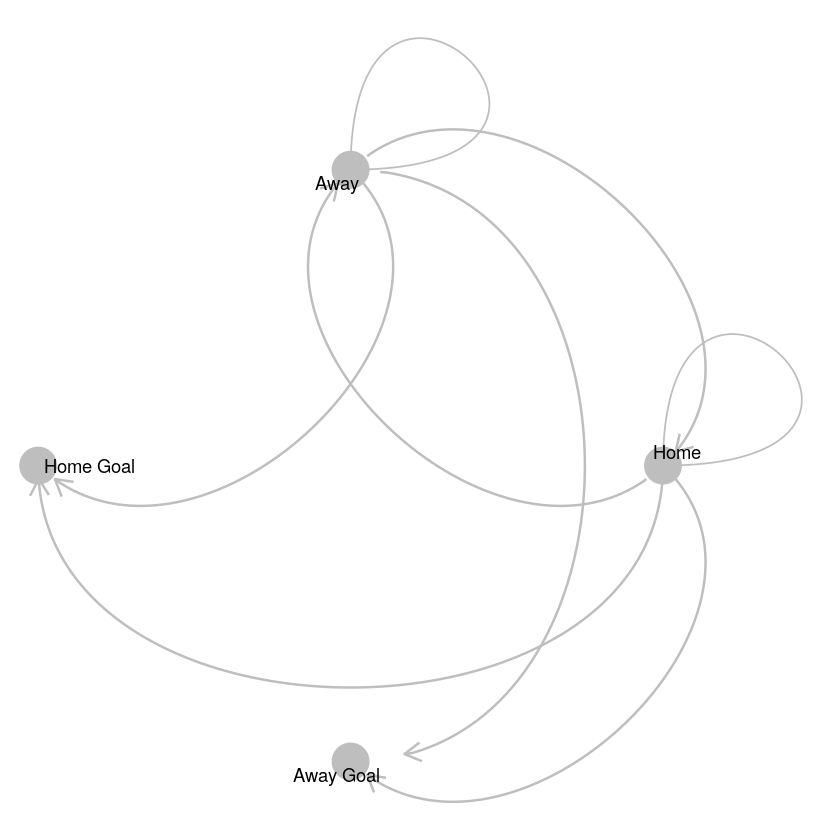

In [36]:
ggraph(simpleg, layout='circle') + 
    geom_edge_arc( aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name),
                     color = weights), 
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey' ) +
    geom_node_point(size=10, color='grey', fill='white') +
    geom_node_text(aes(label = name), repel=T, ) +
    theme_void()

In [103]:
simpleg$weights

4 x 4 sparse Matrix of class "dgCMatrix"
            Home   Away Home Goal Away Goal
Home      226809  97850       568        15
Away      101958 215516        14       420
Home Goal      .      .         .         .
Away Goal      .      .         .         .

In [ ]:
dput(simpleg$weights)

In [ ]:
wm <- new("dgCMatrix", i = c(0L, 1L, 3L, 0L, 1L, 2L, 0L, 1L, 0L, 1L
), p = c(0L, 3L, 6L, 8L, 10L), Dim = c(4L, 4L), Dimnames = list(
    c("Home", "Away", "Home Goal", "Away Goal"), c("Home", "Away", 
    "Home Goal", "Away Goal")), x = c(0.697354585201173, 0.320715427104697, 
1, 0.300852903376563, 0.677919398064849, 1, 0.00174639191740304, 
4.40378977565837e-05, 4.61195048609958e-05, 0.00132113693269751
), factors = list())

In [ ]:
as.matrix(wm)[5,] <- c(0.5,0.5,0,0)

In [ ]:
wdf <- as.data.frame(as.matrix(wm))

In [ ]:
wdf[5,] <- c(0.5,0.5,0,0)

In [ ]:
twdf <- data.frame(as.matrix(t(wdf)))

In [ ]:
twdf[5,] <- c(0,0,0,0, 0)

In [ ]:
names(twdf)[5] <- 'Kickoff'

In [ ]:
ttwdf<- data.frame(t(twdf))

In [ ]:
names(ttwdf)[5] <- 'Kickoff'

In [ ]:
adj_m <- graph_from_adjacency_matrix(as.matrix(ttwdf)*10^7)

In [ ]:
plot(adj_m)

In [ ]:
dput(ttwdf*1000000)

In [ ]:
simpleg$weights[1,] <- simpleg$weights[1,]/sum(simpleg$weights[1,])
simpleg$weights[2,] <- simpleg$weights[2,]/sum(simpleg$weights[2,])

In [ ]:
simpleg$weights[3,] <- c(0,1,0,0)
simpleg$weights[4,] <- c(1,0,0,0)

In [ ]:
simpleg$weights

In [ ]:
# include spatial / pitch-position data
g[]

In [41]:
centr_eigen(g)

$vector
 [1] 0.004449726 0.017733321 0.066222185 0.179957184 0.650954156 1.000000000
 [7] 0.414265005 0.269087650 0.072384507 0.019383499 0.004863797

$value
[1] 3.985261

$options
$options$bmat
[1] "I"

$options$n
[1] 11

$options$which
[1] "LA"

$options$nev
[1] 1

$options$tol
[1] 0

$options$ncv
[1] 0

$options$ldv
[1] 0

$options$ishift
[1] 1

$options$maxiter
[1] 1000

$options$nb
[1] 1

$options$mode
[1] 1

$options$start
[1] 1

$options$sigma
[1] 0

$options$sigmai
[1] 0

$options$info
[1] 0

$options$iter
[1] 9

$options$nconv
[1] 1

$options$numop
[1] 29

$options$numopb
[1] 0

$options$numreo
[1] 13


$centralization
[1] 0.9222999

$theoretical_max
[1] 9

In [40]:
data.frame(page_rank(g)$vector)*10

,page_rank.g..vector
,<dbl>
J. Matip,0.2128503
L. Karius,0.3937731
V. van Dijk,0.9522738
J. Milner,0.6175667
T. Alexander-Arnold,1.2450949
A. Oxlade-Chamberlain,2.3873547
J. Henderson,0.7420156
A. Robertson,0.7201632
Roberto Firmino,0.8249890


In [39]:
data.frame(betweenness(g))

,betweenness.g.
,<dbl>
J. Matip,0
L. Karius,9
V. van Dijk,16
J. Milner,21
T. Alexander-Arnold,25
A. Oxlade-Chamberlain,25
J. Henderson,0
A. Robertson,21
Roberto Firmino,16


In [38]:
data.frame(closeness(g)*100)

Warning message in closeness(g):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”

,closeness.g....100
,<dbl>
J. Matip,2.0000000
L. Karius,1.9607843
V. van Dijk,1.8867925
J. Milner,1.7857143
T. Alexander-Arnold,1.6666667
A. Oxlade-Chamberlain,1.7543860
J. Henderson,1.6393443
A. Robertson,1.2048193
Roberto Firmino,1.0989011


In [37]:
alpha.centrality(g)

J. Matip             L. Karius           V. van Dijk 
                    1                     2                     3 
            J. Milner   T. Alexander-Arnold A. Oxlade-Chamberlain 
                    4                    -7                   -12 
         J. Henderson          A. Robertson       Roberto Firmino 
                   -6                   -11                   -10 
        Mohamed Salah                  Goal 
                   -9                    -8